# Setting things up

In [1]:
from general import *
from exp1 import *
import time
import pandas as pd
import multiprocessing as mp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

random_state=42
np.random.seed(random_state)
cpu=mp.cpu_count() 
cpu

8

In [2]:
####
alpha=.1 #Significance level
iterations=480 #MC simulations to calculate type-1 error and power

m=800 #Training set size
n=200 #Test set size
B=100 #Number of permutations/samplings (RESIT,CRT,CPT)
npar = 5 #Number of different values for parameters like gamma, theta, c etc.
nbas = 5 #Number of different generative configurations (different pairs (a,b))

ps=[20,30,40] #Z dim
thetas = [0,1,2,3,4]
us=[0,50,100,500,1000] #unlabeled set size for RBPT2
gammas = np.linspace(0,.02,npar)
cs = np.linspace(0,.4,npar)

####
skews = [0,3]
losses = ['mse']

# Experiments

In [3]:
results = {'set':[], 'p':[],
           'ba':[], 'c':[], 'theta':[], 'skew':[], 'u':[], 'gamma':[], 'loss':[],
           'stfr':[], 'resit':[], 'gcm':[], 'crt':[], 'cpt':[],'rbpt':[], 'rbpt2':[],
           'stfr_time':[], 'resit_time':[], 'gcm_time':[], 'crt_time':[], 'cpt_time':[], 'rbpt_time':[], 'rbpt2_time':[]}

In [4]:
bas = []
for i in range(nbas):
    bas.append({})
    for p in ps:
        bas[-1][p] = [np.random.normal(0, 1, p).reshape(p,1), np.random.normal(0, 1, p).reshape(p,1)]

In [5]:
count=0

for ba in bas:
    for p in tqdm(ps):       
        # Parameters a and b
        b = ba[p][0]
        a = ba[p][1]
    
        for skew in skews:
            for loss in losses:

                #### Type I error ####
                c = 0

                #First plot: CRT, CPT, RBPT#
                #print("\nType I error: first plot")
                tests = {'stfr':False, 'resit':False, 'gcm':False, 'crt':True, 'cpt':True, 'rbpt':True, 'rbpt2':False}
                u = 0

                for theta in thetas:
                    for gamma in gammas:
                        # Running
                        pool = mp.Pool(cpu)
                        out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, u, p, loss, alpha, B, tests) for it in range(iterations)])
                        pool.close()
                        pool.join()
                        out = np.array(out).mean(axis=0)

                        # Storing results
                        results['set'].append('type1_sim'); results['p'].append(p)
                        results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['u'].append(u); results['gamma'].append(gamma); results['loss'].append(loss) 
                        results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
                        results['stfr_time'].append(out[7]); results['resit_time'].append(out[8]); results['gcm_time'].append(out[9]); results['crt_time'].append(out[10]); results['cpt_time'].append(out[11]); results['rbpt_time'].append(out[12]); results['rbpt2_time'].append(out[13])


                #Second plot: STFR, RESIT, GCM, RBPT2#
                #print("Type I error: second plot")
                tests = {'stfr':True, 'resit':True, 'gcm':True, 'crt':False, 'cpt':False, 'rbpt':True, 'rbpt2':True}
                theta = 0
                u = 0

                for gamma in gammas:
                    # Running
                    pool = mp.Pool(cpu)
                    out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, u, p, loss, alpha, B, tests) for it in range(iterations)])
                    pool.close()
                    pool.join()
                    out = np.array(out).mean(axis=0)

                    # Storing results
                    results['set'].append('type1_reg'); results['p'].append(p)
                    results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['u'].append(u); results['gamma'].append(gamma); results['loss'].append(loss) 
                    results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
                    results['stfr_time'].append(out[7]); results['resit_time'].append(out[8]); results['gcm_time'].append(out[9]); results['crt_time'].append(out[10]); results['cpt_time'].append(out[11]); results['rbpt_time'].append(out[12]); results['rbpt2_time'].append(out[13])

                #Third plot: RBPT2 in the semi-supervised setting#
                if p==40:
                    #print("Type I error: third plot")
                    tests = {'stfr':False, 'resit':False, 'gcm':False, 'crt':False, 'cpt':False, 'rbpt':False, 'rbpt2':True}
                    theta = 0

                    for u in us:
                        for gamma in gammas:
                            # Running
                            pool = mp.Pool(cpu)
                            out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, u, p, loss, alpha, B, tests) for it in range(iterations)])
                            pool.close()
                            pool.join()
                            out = np.array(out).mean(axis=0)

                            # Storing results
                            results['set'].append('type1_semisup'); results['p'].append(p)
                            results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['u'].append(u); results['gamma'].append(gamma); results['loss'].append(loss) 
                            results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
                            results['stfr_time'].append(out[7]); results['resit_time'].append(out[8]); results['gcm_time'].append(out[9]); results['crt_time'].append(out[10]); results['cpt_time'].append(out[11]); results['rbpt_time'].append(out[12]); results['rbpt2_time'].append(out[13])

                #### Power ####
                if p==30:
                    #print("Power\n")
                    tests={'stfr':True, 'resit':True, 'gcm':True, 'crt':True, 'cpt':True, 'rbpt':True, 'rbpt2':True}
                    theta = 0
                    gamma = 0
                    u = 0
    
                    for c in cs:
                        # Running
                        pool = mp.Pool(cpu)
                        out = pool.starmap(exp1, [(it, theta, gamma, c, a, b, skew, m, n, u, p, loss, alpha, B, tests) for it in range(iterations)])
                        pool.close()
                        pool.join()
                        out = np.array(out).mean(axis=0)
    
                        # Storing results
                        results['set'].append('power'); results['p'].append(p)
                        results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['u'].append(u); results['gamma'].append(gamma); results['loss'].append(loss) 
                        results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(out[3]); results['cpt'].append(out[4]); results['rbpt'].append(out[5]); results['rbpt2'].append(out[6])
                        results['stfr_time'].append(out[7]); results['resit_time'].append(out[8]); results['gcm_time'].append(out[9]); results['crt_time'].append(out[10]); results['cpt_time'].append(out[11]); results['rbpt_time'].append(out[12]); results['rbpt2_time'].append(out[13])

    # Update 'count'
    count+=1

100%|███████████████████████████████████████████| 3/3 [5:15:35<00:00, 6311.68s/it]


In [6]:
1

1

## Saving results

In [16]:
results = pd.DataFrame(results)
results.to_csv('results/artificial_data_experiments.csv')

In [17]:
results = pd.read_csv('results/artificial_data_experiments.csv')
results = results.iloc[:,1:]

In [18]:
results.iloc[:,16:].describe()

,stfr_time,resit_time,gcm_time,crt_time,cpt_time,rbpt_time,rbpt2_time
count,200.000000,200.000000,200.000000,800.000000,800.000000,950.000000,450.000000
mean,0.000646,0.105745,0.000513,0.016762,0.596072,0.000456,1.234504
std,0.000129,0.017403,0.000077,0.003163,0.072407,0.000071,0.821730
min,0.000431,0.065173,0.000347,0.012365,0.456168,0.000299,0.519917
25%,0.000565,0.092580,0.000455,0.014539,0.544479,0.000406,0.816623
50%,0.000602,0.104857,0.000508,0.016471,0.590700,0.000441,0.865837
75%,0.000705,0.121363,0.000571,0.017906,0.624456,0.000481,1.005329
max,0.001016,0.150614,0.000714,0.036114,1.077658,0.000948,4.917688


Preparing for plots

In [19]:
#skew = 0
loss = 'mse'

names = {'type1_sim':['RBPT', 'CRT', 'CPT'],
         'type1_reg':['RBPT','RBPT2','STFR','RESIT','GCM'],
         'type1_semisup':['RBPT2'],
         'power':['RBPT', 'RBPT2','CPT']} #'STFR','RESIT','GCM', 'CRT', 

var_names = {'type1_sim':'theta',
             'type1_reg':'p',
             'power':'c'}

colors = {'RBPT':'#1f77b4', 'RBPT2':'#ff7f0e', 'STFR':'#2ca02c', 'RESIT':'#d62728', 'GCM':'#9467bd', 'CRT':'#8c564b', 'CPT':'#e377c2'}

columns_by = ['set', 'p', 'c', 'theta', 'skew', 'u', 'gamma','loss']
results_mean = results.groupby(by=columns_by).mean().reset_index()
results_std = results.groupby(by=columns_by).std().reset_index()

Semi-supervised experiment

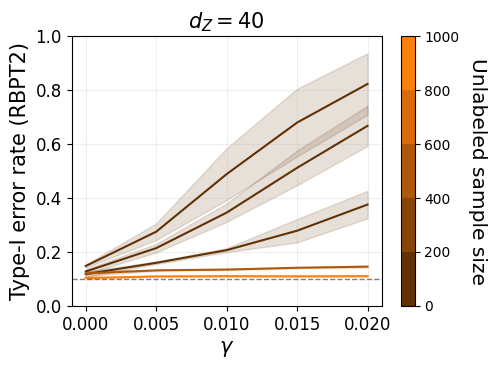

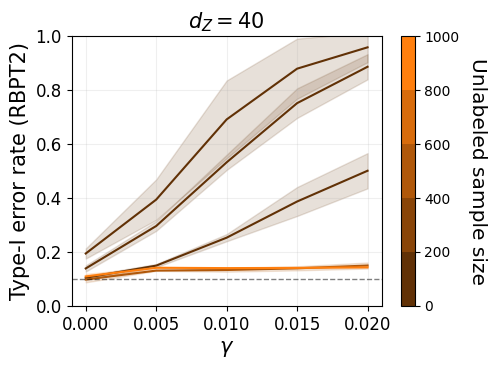

In [20]:
for skew in skews:
    for p in [40]:
        plt.figure(figsize=(5,3.5))
    
        ### Semi-sup Type-I error plot
        plt.subplot(1, 1, 1)
        result_set = 'type1_semisup'
        colors2 = [plt.cm.plasma(0), "orange"]
        n_bins = [3, 2]  # Discretizes the interpolation into bins
        cmap_name = 'custom_plasma'
        new_cmap = LinearSegmentedColormap.from_list(cmap_name, colors2, N=sum(n_bins))
        cmap = new_cmap
        norm = plt.Normalize(us[0],us[-1])
    
        # Define your desired color transition from yellow to orange
        colors2 = ["#613106", '#ff7f0e']
        n_bins = [3, 2]  # Discretizes the interpolation into bins
        cmap_name = 'custom_plasma'
        new_cmap = LinearSegmentedColormap.from_list(cmap_name, colors2, N=sum(n_bins))
        cmap = new_cmap
        norm = plt.Normalize(us[0], us[-1])
    
        for u in us:
            ind_row = (results_mean.set==result_set)&(results_mean.p==p)&(results_mean.u==u)&(results_mean.loss==loss)&(results_mean['skew']==skew)
            x, y, z = gammas, results_mean.loc[ind_row, 'rbpt2'], results_std.loc[ind_row, 'rbpt2']
            plt.plot(x, y, color=cmap(norm(u)))
            plt.fill_between(x, y-z, y+z, color=cmap(norm(u)), alpha=.15)
    
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        cbar = plt.colorbar(sm)
        cbar.set_label('Unlabeled sample size', rotation=270, labelpad=20, size=14.5)
        plt.xticks(fontsize=12)
        plt.xlabel('$\gamma$', size=15)
        plt.yticks(fontsize=12)
        plt.ylabel('Type-I error rate (RBPT2)', size=15)
        plt.title("$d_Z={:}$".format(p), size=15) #RBPT2: incoporating unlabeled \n data when 
        plt.axhline(y=alpha, color='k', linestyle='--', lw=1, alpha=.5)
        plt.grid(alpha=.2)
        plt.ylim(0,1)   
    
        
        plt.savefig('plots/type1_semisup_p{:}_skew{:}_loss{:}.png'.format(p, skew, loss), bbox_inches='tight', dpi=300, transparent=True)    
        plt.show()

Power

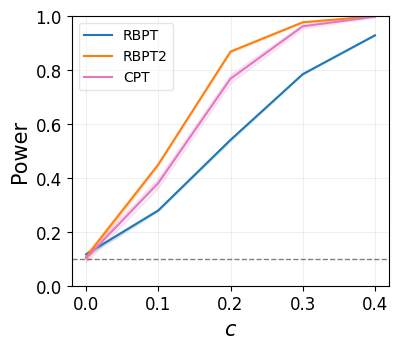

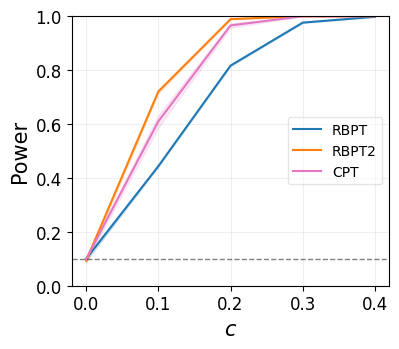

In [21]:
for skew in skews:
    for p in [30]:
        plt.figure(figsize=(4.1,3.5))
    
        ### Power plot
        plt.subplot(1, 1, 1)
        result_set = 'power'
        ind_row = (results_mean.set==result_set)&(results_mean.p==p)&(results_mean.loss==loss)&(results_mean['skew']==skew)
        for test in names[result_set]:
            x, y, z = cs, results_mean.loc[ind_row,test.lower()], results_std.loc[ind_row,test.lower()]
            plt.plot(x, y, label=test, color=colors[test])
            plt.fill_between(x, y-z, y+z, color=colors[test], alpha=.15)
        plt.xticks(fontsize=12)
        plt.xlabel('$c$', size=15)
        plt.yticks(fontsize=12)
        plt.ylabel('Power', size=15)
        plt.grid(alpha=.2)
        plt.ylim(0,1)
        plt.axhline(y=alpha, color='k', linestyle='--', lw=1, alpha=.5)
        plt.legend(framealpha=.5) #loc='upper left', bbox_to_anchor=(1, .85), ncol=1
        
        plt.savefig('plots/power_p{:}_skew{:}_loss{:}.png'.format(p, skew, loss), bbox_inches='tight', dpi=300, transparent=True)    
        plt.show()

Type-I error control plots

In [22]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.3   # the amount of height reserved for white space between subplots

gammas2 = [0, .02]
ps2 = [30, 40]
skew = 0
loss = 'mse'

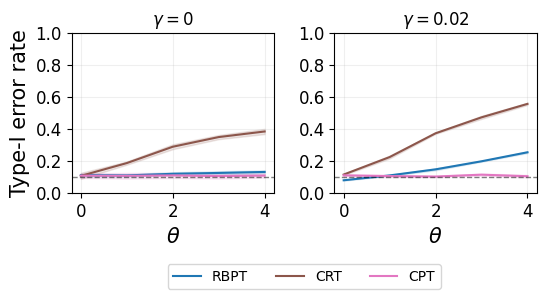

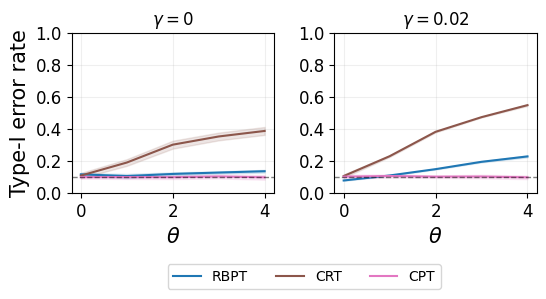

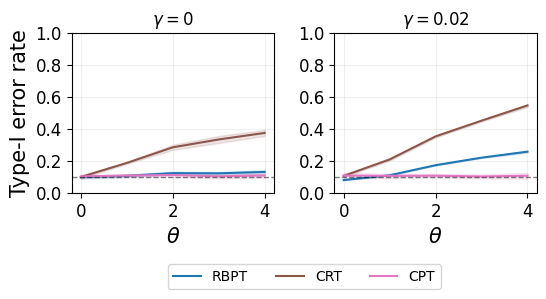

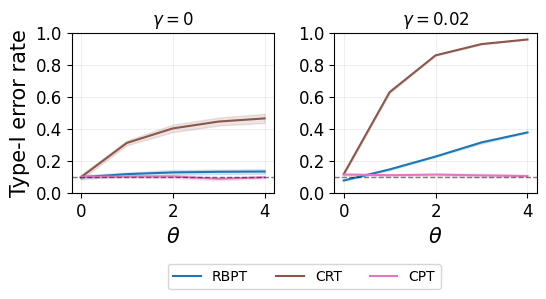

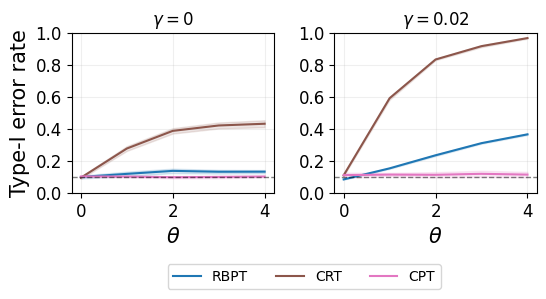

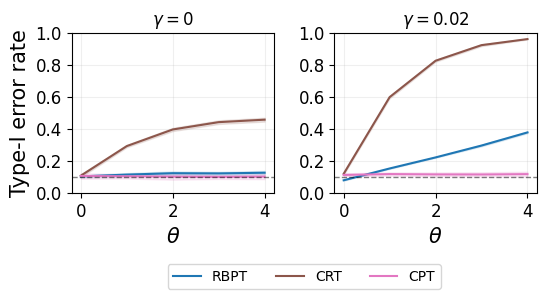

In [23]:
result_set='type1_sim'

for skew in skews:
    for p in ps:
    
        plt.figure(figsize=(6,2))
        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        
        i = 0
        for gamma in gammas2:
            
            plt.subplot(1, 2, i+1)
            
            for test in names[result_set]:
                ind_row = (results_mean.gamma==gamma)&(results_mean.set==result_set)&(results_mean.p==p)&(results_mean.loss==loss)&(results_mean['skew']==skew)
        
                x, y, z = thetas, results_mean.loc[ind_row, test.lower()], results_std.loc[ind_row, test.lower()]
                plt.plot(x, y, label=test, color=colors[test])
                plt.fill_between(x, y-z, y+z, color=colors[test], alpha=.15)
            
            plt.xticks(fontsize=12)
            plt.xlabel('$\\theta$', size=15)
            plt.yticks(fontsize=12)
            if i==0:plt.ylabel('Type-I error rate', size=15)
            else: plt.ylabel('', size=1)
                
            plt.title("$\\gamma={:}$".format(gamma))
            plt.grid(alpha=.2)
            plt.ylim(0,1)
            plt.axhline(y=alpha, color='k', linestyle='--', lw=1, alpha=.5)
            
            i+=1
        
        plt.legend(loc='upper center', bbox_to_anchor=(-.15, -0.4), ncol=15)
        plt.savefig('plots/type1_sim_p{:}_skew{:}_loss{:}.png'.format(p, skew, loss), bbox_inches='tight', dpi=300, transparent=True)  
        plt.show()

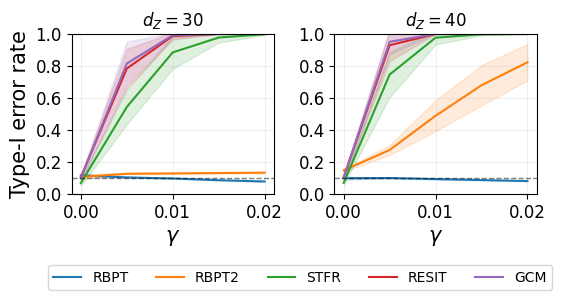

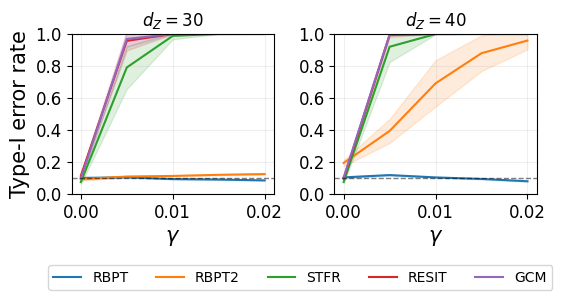

In [24]:
result_set='type1_reg'

for skew in skews:
    
    plt.figure(figsize=(6,2))
    plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        
    i = 0
    for p in ps2:
            
        plt.subplot(1, 2, i+1)
            
        for test in names[result_set]:
            ind_row = (results_mean.p==p)&(results_mean.set==result_set)&(results_mean.loss==loss)&(results_mean['skew']==skew)
        
            x, y, z = gammas, results_mean.loc[ind_row, test.lower()], results_std.loc[ind_row, test.lower()]
            plt.plot(x, y, label=test, color=colors[test])
            plt.fill_between(x, y-z, y+z, color=colors[test], alpha=.15)
            
        plt.xticks(fontsize=12)
        plt.xlabel('$\\gamma$', size=15)
        plt.yticks(fontsize=12)
        if i==0:plt.ylabel('Type-I error rate', size=15)
        else: plt.ylabel('', size=1)
                
        plt.title("$d_Z={:}$".format(p))
        plt.grid(alpha=.2)
        plt.ylim(0,1)
        plt.axhline(y=alpha, color='k', linestyle='--', lw=1, alpha=.5)
            
        i+=1
        
    plt.legend(loc='upper center', bbox_to_anchor=(-.17, -0.4), ncol=15)
    plt.savefig('plots/type1_reg_skew{:}_loss{:}.png'.format(skew, loss), bbox_inches='tight', dpi=300, transparent=True) 
    plt.show()